##### Optimize the data management of a store

![Logo BottleNeck](img/bottleneck_logo.png)\
Beginning of a mission as a freelance data analyst at BottleNeck, a very prestigious wine merchant. Our manager on this mission asks us to clean, structure a database and then to make an analysis in order to give him a feedback on the different products during a future meeting.

Our missions will be : 

- [ ] Reconcile the different databases, in order to have a unique database
- [ ] Sales by product + total sales made online
- [ ] Inspecting data entry errors in certain product prices. 

# Contents
- <font size = "4">[**Part 1: Data**](#chapter1)</font>
    - [Data import](#section1.1)
    - [Data cleaning](#section1.2)
        - [Dataframe - df_liaison](#section1.2.1)
        - [Dataframe - df_web](#section1.2.2)
        - [Dataframe - df_erp](#section1.2.3)
        
    
- <font size = "4">[**Part 2 : Data merge**](#chapter2)</font>
    - [Merge : df_erp & df_liaison](#section2.1)
    - [Merge : df_liaison & df_web_product](#section2.2)
    - [Merge : erp_liaison & df_web_product](#section2.3)
    
    
- <font size = "4">[**Part 3: Univariate Data Analysis**](#chapter3)</font>
    - [Sales by product & total sales](#section3.1)
        - [Analysis of the turnover according to the status of the stocks](#section3.1.1)
        - [Analysis of the number of sales by product](#section3.1.2)
    - [Analysis of the "price" variable](#section3.2)
        -  [Outlier detection](#section3.2.1)
        -  [Z-score method](#section3.2.2)
        -  [Quartile method](#section3.2.3)
        -  [Difference between the 2 methods](#section3.2.4)
    - [Bonus](#section3.3)
        -  [Number of products by price range](#section3.3.1)
        -  [Relationship between price and number of sales](#section3.3.2)
        -  [Segmentation of the turnover : Top 10, 20, 30, 40](#section3.3.3)
___
# Part 1: Data <a class="anchor" id="chapter1"></a>
---
In this part, we will see everything that concerns the import and the cleaning of data. 
Concerning data cleaning we will see the different types of errors in a database: 
- Type errors,
- Missing values,
- Duplicates,
- Outliers (depending on the variables),
- Structure

# <font color = #9f343e>1.1 | Data Import</font> <a class="anchor" id="section1.1"></a>
The data is provided to us by our manager by email. A file from the ERP (erp.xlsx), one from the product table of the online sales platform (web.xlsx).
In a second email, he sends us another file that lists the *product_id* of the ERP with their reference on the web side (link.xlsx). 

In [201]:
# Import of libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numbers
import random
import plotly.express as px
import plotly.io as pio
import seaborn as sns

# Parameter graph
pio.templates.default = "plotly_white"

In [202]:
# Import of dataframe
df_liaison = pd.read_excel('data/liaison.xlsx',0, header=0)
df_web = pd.read_excel('data/web.xlsx',0,header=0)
df_erp = pd.read_excel('data/erp.xlsx',0,header=0)

/Users/corentincasali/opt/anaconda3/lib/python3.8/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning:

Unknown extension is not supported and will be removed



***Code facilitating the visonnage of the dataframes (columns in HTML not reducing)...***

In [203]:
%%html
<style>
.dataframe td {
    white-space: nowrap;
    overflow: hidden;
    text-overflow: ellipsis;
    column-width: 30em;
}
</style>

# <font color = #9f343e>1.2 | Data Cleaning</font> <a class="anchor" id="section1.2"></a>

In [204]:
# Checking of the 3 dataframe
print(df_liaison.info())
print()
print(df_web.info())
print()
print(df_erp.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   product_id  825 non-null    int64 
 1   id_web      734 non-null    object
dtypes: int64(1), object(1)
memory usage: 13.0+ KB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1513 entries, 0 to 1512
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   sku                    1428 non-null   object        
 1   virtual                1513 non-null   int64         
 2   downloadable           1513 non-null   int64         
 3   rating_count           1513 non-null   int64         
 4   average_rating         1430 non-null   float64       
 5   total_sales            1430 non-null   float64       
 6   tax_status             716 non-null    object        
 7   tax_class              0 non-null   

## <font color = #34749f>1.2.1 | Dataframe - df_liaison </font><a class="anchor" id="section1.2.1"></a>

df_liaison corresponds to an Excel table that allows **to establish the link** between the **product reference in the ERP (product_id)** and the **product reference of the same product in the online store database (SKU)**, created by their former intern
### Checking for errors in df_liaison :

In [205]:
df_liaison.head()

,product_id,id_web
0,3847,15298
1,3849,15296
2,3850,15300
3,4032,19814
4,4039,19815


In [206]:
df_liaison.shape

(825, 2)

As we can see, we have 825 values, filled in on 2 different variables. We have : 
- product_id : corresponds to the product identifier on **df_erp**.
- id_web : corresponds to the product id on **df_web**

In [207]:
df_liaison.dtypes

product_id     int64
id_web        object
dtype: object

**INFORMATION**: We notice that the variables do not have the same data type, whereas with .head() we would expect to have identical data types on both sides. \
Let's check why the **id_web** variable is in object.

In [208]:
df_liaison.loc[df_liaison['id_web'].str.isnumeric()==False]

,product_id,id_web
443,4954,bon-cadeau-25-euros
822,7247,13127-1
823,7329,14680-1


We have 3 data in **id_web** which are strings. Several solutions are available to us:
- Do not change anything, but take it into account for the rest of the processing
- Make the change on all the tables.

In our case, we won't change anything but just take it into account for the rest of the process.

### Checking the missing values of the df_liaison:

In [209]:
print(df_liaison.isnull().sum())
print()
print(df_liaison.isnull().mean())
print("-"*30)
print("We currently have",df_liaison.isnull().sum()[1],
      "missing values for the variable 'id_web', which represents",'{:,.2%}'.format(df_liaison.isnull().mean()[1]),
      "of the total data for the variable.")



product_id     0
id_web        91
dtype: int64

product_id    0.000000
id_web        0.110303
dtype: float64
------------------------------
We currently have 91 missing values for the variable 'id_web', which represents 11.03% of the total data for the variable.


It is important to note the missing values for the rest of the process. No changes will be made for the moment until we see the data from the other dataframes. The missing values only concern df_liaison for the moment.

### Checking for duplicates in df_liaison :

**Creation of a function to detect duplicates in the dataframe**.

In [210]:
def doublons(df): 
    # Def Function
    '''
    This function just allows us to check if there are duplicates in the dataframe by comparing
    the length of the initial dataframe and the length of the dataframe when we remove the duplicates.
    '''
    results = len(df) - len(df.drop_duplicates())
    
    # Results
    print(results,'duplicate(s) in this dataframe')

In [211]:
doublons(df_liaison)

0 duplicate(s) in this dataframe


### <font color = #9f343e>**Summary :** </font>
We have just finished inspecting df_liaison\
To remember: 
- There are missing values in the 'id_web' variable.

## <font color = #34749f>1.2.2 | Dataframe - df_web </font><a class="anchor" id="section1.2.2"></a>
df_web contains the **information of the products sold online** (name, description, number of sales...). 
### Checking for df_web type errors:

In [212]:
df_web.head()

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&#038;p=4954,0.0,product,NaN,0.0
1,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&#038;p=3847,0.0,product,NaN,0.0
2,15296,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 13:49:41,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&#038;p=3849,0.0,product,NaN,0.0
3,15300,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 14:08:36,...,pierre-jean-villa-croze-hermitage-accroche-coeur-2018,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&#038;p=3850,0.0,product,NaN,0.0
4,19814,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-09 14:01:05,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&#038;p=4032,0.0,product,NaN,0.0


In [213]:
df_web.shape

(1513, 28)

As we can see above, we have 1513 rows for 28 different variables. We have in particular :
- sku: corresponds to id_web (df_liaison)
- total_sales : number of sales
- post_date : date of the product online
- post_modified : date of the update of the product file
- post_name : product name
- post_type : product type

In [214]:
df_web.dtypes

sku                              object
virtual                           int64
downloadable                      int64
rating_count                      int64
average_rating                  float64
total_sales                     float64
tax_status                       object
tax_class                       float64
post_author                     float64
post_date                datetime64[ns]
post_date_gmt            datetime64[ns]
post_content                    float64
post_title                       object
post_excerpt                     object
post_status                      object
comment_status                   object
ping_status                      object
post_password                   float64
post_name                        object
post_modified            datetime64[ns]
post_modified_gmt        datetime64[ns]
post_content_filtered           float64
post_parent                     float64
guid                             object
menu_order                      float64


At first sight, no problem of types for the different variables of the dataframe.
### Checking the structure of df_web: 
First thing to do is to rename the variable **sku** -> **id_web** to be able to mmerge  with the dataframe df_liaison in order to have a match for future merges.

In [215]:
df_web = df_web.rename(columns={'sku':'id_web'})

In [216]:
df_web.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1513 entries, 0 to 1512
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id_web                 1428 non-null   object        
 1   virtual                1513 non-null   int64         
 2   downloadable           1513 non-null   int64         
 3   rating_count           1513 non-null   int64         
 4   average_rating         1430 non-null   float64       
 5   total_sales            1430 non-null   float64       
 6   tax_status             716 non-null    object        
 7   tax_class              0 non-null      float64       
 8   post_author            1430 non-null   float64       
 9   post_date              1430 non-null   datetime64[ns]
 10  post_date_gmt          1430 non-null   datetime64[ns]
 11  post_content           0 non-null      float64       
 12  post_title             1430 non-null   object        
 13  pos

In [217]:
# Column with count of values equal to 0
df_web.loc[:,df_web.count()==0]

,tax_class,post_content,post_password,post_content_filtered
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN
...,...,...,...,...
1508,NaN,NaN,NaN,NaN
1509,NaN,NaN,NaN,NaN
1510,NaN,NaN,NaN,NaN
1511,NaN,NaN,NaN,NaN


When we look at the .info of the **df_web** dataframe, we see several variables that have no value. We will therefore delete them to lighten our dataframe.

**Note**: We can delete these variables because they will not be used in the analysis. This is not a modification of the database.

**Creation of a function to clean up empty columns

In [218]:
def del_countcolumns(df):
    # Def Function
    '''
    This function just allows us to remove the variables from the dataframe that have no value inside, 
    allowing us to lighten our dataframe
    '''
    columns_del = list(df.loc[:,df.count()==0].columns)
    df.drop(columns_del, axis=1, inplace=True)
    
    # Results
    return(print('Name of the variables deleted because no value inside:',columns_del))

In [219]:
del_countcolumns(df_web)

Name of the variables deleted because no value inside: ['tax_class', 'post_content', 'post_password', 'post_content_filtered']


### Checking for missing values in df_web : 

In [220]:
df_web.isnull().sum()

id_web                85
virtual                0
downloadable           0
rating_count           0
average_rating        83
total_sales           83
tax_status           797
post_author           83
post_date             83
post_date_gmt         83
post_title            83
post_excerpt         797
post_status           83
comment_status        83
ping_status           83
post_name             83
post_modified         83
post_modified_gmt     83
post_parent           83
guid                  83
menu_order            83
post_type             83
post_mime_type       799
comment_count         83
dtype: int64

We notice that we have 85 missing values for the variable **id_web**.

In [221]:
# We only take into account the 'id_web' which are null
df_web.loc[df_web['id_web'].isnull(),:]

,id_web,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,post_author,post_date,post_date_gmt,...,ping_status,post_name,post_modified,post_modified_gmt,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
178,NaN,0,0,0,NaN,NaN,NaN,NaN,NaT,NaT,...,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN
179,NaN,0,0,0,NaN,NaN,NaN,NaN,NaT,NaT,...,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN
227,NaN,0,0,0,NaN,NaN,NaN,NaN,NaT,NaT,...,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN
230,NaN,0,0,0,NaN,NaN,NaN,NaN,NaT,NaT,...,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN
231,NaN,0,0,0,NaN,NaN,NaN,NaN,NaT,NaT,...,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
792,NaN,0,0,0,NaN,NaN,NaN,NaN,NaT,NaT,...,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN
793,NaN,0,0,0,NaN,NaN,NaN,NaN,NaT,NaT,...,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN
794,NaN,0,0,0,NaN,NaN,NaN,NaN,NaT,NaT,...,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN
795,NaN,0,0,0,NaN,NaN,NaN,NaN,NaT,NaT,...,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN


There is missing data in the **id_web** variable . Since it is an **identifier**, there should not be any missing data (or null data)

Looking at the previous cell, we can assume that all rows are empty. <font color="#9f343e"> **Nevertheless, we will check if they really are.**</font>

In [222]:
# Taking into account only the 'id_web' which are null, we look if there are notnull variables
df_web.loc[df_web['id_web'].isnull(),:].notnull().sum()

id_web                0
virtual              85
downloadable         85
rating_count         85
average_rating        2
total_sales           2
tax_status            2
post_author           2
post_date             2
post_date_gmt         2
post_title            2
post_excerpt          2
post_status           2
comment_status        2
ping_status           2
post_name             2
post_modified         2
post_modified_gmt     2
post_parent           2
guid                  2
menu_order            2
post_type             2
post_mime_type        0
comment_count         2
dtype: int64

We notice that several variables are not **null** while on the contrary the **id_web** is **null**. We will see in details why:

In [223]:
df_web[df_web['id_web'].isnull() & df_web["post_name"].notnull()]

,id_web,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,post_author,post_date,post_date_gmt,...,ping_status,post_name,post_modified,post_modified_gmt,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
470,NaN,0,0,0,0.0,0.0,taxable,2.0,2018-07-31 12:07:23,2018-07-31 10:07:23,...,closed,pierre-jean-villa-cote-rotie-fongeant-2017,2019-11-02 13:24:15,2019-11-02 12:24:15,0.0,https://www.bottle-neck.fr/?post_type=product&#038;p=5070,0.0,product,NaN,0.0
471,NaN,0,0,0,0.0,0.0,taxable,2.0,2018-08-08 11:23:43,2018-08-08 09:23:43,...,closed,pierre-jean-villa-condrieu-suspendu-2018,2019-11-02 13:24:01,2019-11-02 12:24:01,0.0,https://www.bottle-neck.fr/?post_type=product&#038;p=5075,0.0,product,NaN,0.0


We have just seen that **id_web** that are NaNs have a product match.


So we will delete the rows that only have NaNs in **id_web** but do not have a product match. 

In [224]:
# Index recovery (NaN) pour id_web
id_web_nan_out = df_web.loc[df_web['id_web'].isnull(),:].index

# Indexes recovery (NaN) for id_web but which have a product match
id_web_nan_in = df_web[df_web['id_web'].isnull() & df_web["post_name"].notnull()].index

# We make the difference between the two lists, to delete only the NaN 'index' without product match
diff_id_web_nan = list(set(id_web_nan_out).difference(id_web_nan_in))
len(diff_id_web_nan)

83

In [225]:
# Removal of indexes that are only NaN : 
df_web.drop(diff_id_web_nan,inplace=True)
df_web.reset_index(drop=True,inplace=True)
print("Number of rows deleted:",len(diff_id_web_nan))

Number of rows deleted: 83


In [226]:
# Check #2
df_web.isnull().sum()

id_web                 2
virtual                0
downloadable           0
rating_count           0
average_rating         0
total_sales            0
tax_status           714
post_author            0
post_date              0
post_date_gmt          0
post_title             0
post_excerpt         714
post_status            0
comment_status         0
ping_status            0
post_name              0
post_modified          0
post_modified_gmt      0
post_parent            0
guid                   0
menu_order             0
post_type              0
post_mime_type       716
comment_count          0
dtype: int64

**Notes:** id_web = 2 (for .isnull().sum()) which is correct because we have kept the 2 IDs that have a correspondence with a product.

In [227]:
# Creation of a list containing the variables that still have missing data
list_null_web = list(df_web.columns[df_web.isnull().sum()>0])
list_null_web

['id_web', 'tax_status', 'post_excerpt', 'post_mime_type']

In [228]:
# Inspection of the dataframe with variables that have missing data
df_web[list_null_web]

,id_web,tax_status,post_excerpt,post_mime_type
0,bon-cadeau-25-euros,taxable,"<span style=""color: #a85253;""><strong>Parlons peu, parlons vin.</strong>\n<strong>Parlons cadeau !</strong></span>\n\nUn bon cadeau à offrir à vos proches... sans modération !",NaN
1,15298,taxable,"Il exhale un nez subtil, racé avec du poivre fin et de la tourbe. La bouche est une caresse grâce à des tanins élégants. De la haute couture.",NaN
2,15296,taxable,Les vieilles vignes lui apportent une rare profondeur. L’attaque affiche de l’élégance. La bouche est portée par un minéral saisissant et des tanins de belle qualité. Grande bouteille !,NaN
3,15300,taxable,"Dentelle de fruit de jeunes syrah, aux tanins légers et épicés. Hyper digeste. Un délice.",NaN
4,19814,taxable,Gamine représente tout le fruité et la gourmandise de la syrah. Une touche épicée et des tanins fondus lui apportent une belle complexité.,NaN
...,...,...,...,...
1425,16135,NaN,NaN,image/jpeg
1426,15891,NaN,NaN,image/jpeg
1427,15887,NaN,NaN,image/jpeg
1428,13127-1,NaN,NaN,image/jpeg


The variables that have **NaN** are product descriptions, tax status, and post_mime.type.\
Further analysis of the table needs to be done to determine where the NaNs may have come from. 

### Duplicate df_web check: 
Since each ID should be unique, we should not have any duplicate web_id. 

In [229]:
# Duplicate detection
doublons(df_web[['id_web','post_name']]) 

714 duplicate(s) in this dataframe


**Notes:** We specify 'id_web', 'post_name' because we have IDs that are NaN. They would be considered as duplicates in the analysis whereas they are not really (not having the same name). \
Therefore, adding the product name allows us to avoid this problem. 

So we have duplicates in this dataframe. We will see in detail why the IDs are duplicated. 

**Creation of a function to randomly take IDs for data visualization**

In [230]:
def verification_id(df,column_name):
    # Def
    '''
    Function that allows to take random values from a column to make a duplicate analysis
    '''
    random_id = random.sample(list(df[column_name]),3)
    
    # Result
    display(df.loc[(df[column_name]==random_id[0])|(df[column_name]==random_id[1])|(df[column_name]==random_id[2])].sort_values(column_name))

In [231]:
verification_id(df_web,'id_web')

,id_web,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,post_author,post_date,post_date_gmt,...,ping_status,post_name,post_modified,post_modified_gmt,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
600,12882,0,0,0,0.0,0.0,taxable,2.0,2019-03-28 17:08:38,2019-03-28 16:08:38,...,closed,domaine-de-montbourgeau-vin-de-paille-2013,2020-04-29 15:45:02,2020-04-29 13:45:02,0.0,https://www.bottle-neck.fr/?post_type=product&#038;p=5907,0.0,product,NaN,0.0
1314,12882,0,0,0,0.0,0.0,NaN,2.0,2019-03-28 17:08:38,2019-03-28 16:08:38,...,closed,domaine-de-montbourgeau-vin-de-paille-2013,2020-04-29 15:45:02,2020-04-29 13:45:02,0.0,https://www.bottle-neck.fr/wp-content/uploads/2020/03/domaine-de-montbourgeau-vin-de-paille-2013.jpg,0.0,attachment,image/jpeg,0.0
530,14736,0,0,0,0.0,1.0,taxable,2.0,2019-01-31 11:58:26,2019-01-31 10:58:26,...,closed,gilles-robin-crozes-hermitage-rouge-1920-2016-copie,2020-04-21 10:45:03,2020-04-21 08:45:03,0.0,https://www.bottle-neck.fr/?post_type=product&#038;p=5700,0.0,product,NaN,0.0
1244,14736,0,0,0,0.0,1.0,NaN,2.0,2019-01-31 11:58:26,2019-01-31 10:58:26,...,closed,gilles-robin-crozes-hermitage-rouge-1920-2016-copie,2020-04-21 10:45:03,2020-04-21 08:45:03,0.0,https://www.bottle-neck.fr/wp-content/uploads/2020/03/gilles-robin-crozes-hermitage-rouge-1920-2016-copie.jpg,0.0,attachment,image/jpeg,0.0
328,15576,0,0,0,0.0,0.0,taxable,2.0,2018-04-18 20:37:25,2018-04-18 18:37:25,...,closed,camin-larredya-jurancon-sec-la-part-davant-2018,2020-07-16 10:45:02,2020-07-16 08:45:02,0.0,https://www.bottle-neck.fr/?post_type=product&#038;p=4733,0.0,product,NaN,0.0
1043,15576,0,0,0,0.0,0.0,NaN,2.0,2018-04-18 20:37:25,2018-04-18 18:37:25,...,closed,camin-larredya-jurancon-sec-la-part-davant-2018,2020-07-16 10:45:02,2020-07-16 08:45:02,0.0,https://www.bottle-neck.fr/wp-content/uploads/2020/03/camin-larredya-jurancon-sec-la-part-davant-2018.jpg,0.0,attachment,image/jpeg,0.0


In [232]:
df_web['post_type'].unique()

array(['product', 'attachment'], dtype=object)

After checking, we see that the IDs are duplicated. 

For each ID (*except the NaN*), we have 2 different rows. Looking at the **(post_type)** variable for example, we see that one describes the product (**'product'**) while the other corresponds to an image (**'attachment'**). 

We will therefore create sub-dataframes from the basic dataframe to separate the IDs:
- One sub-dataframe taking into account only **product**,
- Another sub-dataframe taking into account only the **attachment**.

In [233]:
df_web_product = df_web.loc[df_web['post_type']=='product'] 
df_web_attachment = df_web.loc[df_web['post_type']=='attachment']

We keep the dataframe with **post_type** = **attachment** as a precaution. You never know, it may be useful later. 

### Bonus: removal of the columns that have only zeros (0) in the web dataframe
By inspecting the dataframe, we notice that some columns have a lot of 0s inside. \
The goal here is to see in detail, if the columns have only 0's, allowing us to clean the dataframe or not.

In [234]:
# Check if the variables have only zeros :
(df_web_product == 0).all()

id_web               False
virtual               True
downloadable          True
rating_count          True
average_rating        True
total_sales          False
tax_status           False
post_author          False
post_date            False
post_date_gmt        False
post_title           False
post_excerpt         False
post_status          False
comment_status       False
ping_status          False
post_name            False
post_modified        False
post_modified_gmt    False
post_parent           True
guid                 False
menu_order            True
post_type            False
post_mime_type       False
comment_count         True
dtype: bool

In [235]:
# We get the indexes of the columns that have True in the previous check and we make a list
index_web_zero = list((df_web_product == 0).all().index[(df_web_product == 0).all()==True])
index_web_zero

['virtual',
 'downloadable',
 'rating_count',
 'average_rating',
 'post_parent',
 'menu_order',
 'comment_count']

In [236]:
# We delete the useless columns
df_web_product.drop(columns=index_web_zero,inplace=True)

/Users/corentincasali/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



### Additional analysis: size difference in the web_product dataframe and the link dataframe
The **web_product** dataframe corresponds to all the products present on the website.
The **liaison** dataframe corresponds to the correspondence between the web_id and the product_id.

Therefore, it would normally be logical to have the same number of rows. Unless the link table has additional **web_id** not present in the website.

In [237]:
# Shape analysis of the two dataframes: 
print(df_liaison.shape)
print(df_web_product.shape)
print("The number of different rows is :",df_liaison.shape[0]-df_web_product.shape[0])

(825, 2)
(716, 17)
The number of different rows is : 109


we notice that the size of the two dataframes is different, why? (*109 lines of difference*)

**Reminder:** The variable in common between the two dataframes is **id_web**, that's why we will analyze only this variable in the following.

In [238]:
# Reminder of the NaN present in the two dataframes 

display(df_liaison.isnull().sum())
display(df_web_product.isnull().sum())

print("The difference between the two dataframes concerning the NaN of id_web is",df_liaison.isnull().sum()[1]-df_web_product.isnull().sum()[0])
print("This leaves us with",(df_liaison.shape[0]-df_web_product.shape[0])-(df_liaison.isnull().sum()[1]-df_web_product.isnull().sum()[0]),"difference values !")

product_id     0
id_web        91
dtype: int64

id_web                 2
total_sales            0
tax_status             0
post_author            0
post_date              0
post_date_gmt          0
post_title             0
post_excerpt           0
post_status            0
comment_status         0
ping_status            0
post_name              0
post_modified          0
post_modified_gmt      0
guid                   0
post_type              0
post_mime_type       716
dtype: int64

The difference between the two dataframes concerning the NaN of id_web is 89
This leaves us with 20 difference values !


We have eliminated 89 values of differences between the two dataframes just with NaN. But we still have some values to find. 

Where is this difference? 

In [239]:
# How many unique 'id_web' values are there? :
print(df_liaison["id_web"].nunique())
print(df_web_product["id_web"].nunique())
print("The number of different unique web_id between the two dataframes is",df_liaison["id_web"].nunique()-df_web_product["id_web"].nunique())

734
714
The number of different unique web_id between the two dataframes is 20


### <font color = #9f343e>**Conclusion :** </font>
We have just finished inspecting of df_web.\
Things to remember: 
- Changed the variable name sku -> id_web,
- We saw that there were 2 null id_web that had a product match,
- Duplicated IDs in the dataframe -> creation of 2 sub-dataframes
- The difference in size between the two dataframes (web | link) comes from the number of id_web present between the two dataframes. There are more web_id's in the **link** dataframe than in the **web_product** dataframe, hence the difference in size between the 2 dataframes.

## <font color = #34749f>1.2.3 | Dataframe - df_erp </font><a class="anchor" id="section1.2.3"></a>

df_erp contains the **product references, their sales price and their stock status**.
### Checking the ERP dataframe for type errors:

In [240]:
df_erp.head()

,product_id,onsale_web,price,stock_quantity,stock_status
0,3847,1,24.2,0,outofstock
1,3849,1,34.3,0,outofstock
2,3850,1,20.8,0,outofstock
3,4032,1,14.1,0,outofstock
4,4039,1,46.0,0,outofstock


In [241]:
df_erp.shape

(825, 5)

As we can see above, we have 825 rows, filled in on 5 variables. We have : 
- product_id : product identifier (df_liaison)
- onsale_web : allows to know if the product is sold online or not
- price : price of the product
- stock_quantity : available stock of the product in reserve
- stock_status : information about the availability or not of the product

In [242]:
df_erp.dtypes

product_id          int64
onsale_web          int64
price             float64
stock_quantity      int64
stock_status       object
dtype: object

The data types are correct.

### Checking for missing values in the ERP dataframe :

In [243]:
df_erp.isnull().sum()

product_id        0
onsale_web        0
price             0
stock_quantity    0
stock_status      0
dtype: int64

No missing values

### ERP dataframe duplicate check:

In [244]:
doublons(df_erp)

0 duplicate(s) in this dataframe


### ERP dataframe outliers check:

In [245]:
df_erp.describe()

,product_id,onsale_web,price,stock_quantity
count,825.000000,825.000000,825.000000,825.000000
mean,5162.597576,0.869091,32.415636,26.496970
std,902.644635,0.337506,26.795849,45.892422
min,3847.000000,0.000000,5.200000,0.000000
25%,4348.000000,1.000000,14.600000,1.000000
50%,4907.000000,1.000000,24.400000,11.000000
75%,5805.000000,1.000000,42.000000,34.000000
max,7338.000000,1.000000,225.000000,578.000000


For the moment, no worries in the outliers. Numerical variables have possible values. Pas de prix ou de quantité en négatif. No price or quantity in negative.

### <font color = #9f343e>**Conclusion :** </font>
We have just completed the inspection of the ERP.\ dataframe
To remember: 
- No remarks on the ERP dataframe,
- However, further analysis of the variables could detect **outliers**.

<font color = #9f343e>**We have just finished "Part 1: Data", we will move on to the second part concerning the merge** </font>

---
# Partie 2 : Data merge <a class="anchor" id="chapter2"></a>

---

To be able to analyze the different dataframes, we will perform merges between the different dataframes.

# <font color = #9f343e>2.1 | Merge : df_erp & df_liaison </font> <a class="anchor" id="section2.1"></a>
We will first perform a first merge between the **ERP** dataframe and the **link** dataframe.

In [246]:
# Merge ERP | Liaison
j_erp_liaison = pd.merge(df_erp,df_liaison,on='product_id',how='left')
j_erp_liaison

,product_id,onsale_web,price,stock_quantity,stock_status,id_web
0,3847,1,24.2,0,outofstock,15298
1,3849,1,34.3,0,outofstock,15296
2,3850,1,20.8,0,outofstock,15300
3,4032,1,14.1,0,outofstock,19814
4,4039,1,46.0,0,outofstock,19815
...,...,...,...,...,...,...
820,7203,0,45.0,30,instock,NaN
821,7204,0,45.0,9,instock,NaN
822,7247,1,54.8,23,instock,13127-1
823,7329,0,26.5,14,instock,14680-1


In [247]:
print(df_erp.shape)
print(df_liaison.shape)
j_erp_liaison.shape

(825, 5)
(825, 2)


(825, 6)

We perform a join from the left to keep all the values of the **df_erp** dataframe and to have a match with the **df_liaison** dataframe even if it is null.
Moreover, we notice that we have exactly the same number of rows after the join, confirming our good join
### Checking for missing values in the ERP-Liaison join:

In [248]:
j_erp_liaison.isnull().sum()

product_id         0
onsale_web         0
price              0
stock_quantity     0
stock_status       0
id_web            91
dtype: int64

In [249]:
# # To recall the df_link dataframe:
print("df_liaison : We have",df_liaison.isnull().sum()[1],
      "missing values for the variable 'id_web'.")
print()
print("j_erp_liaison : We have",j_erp_liaison.isnull().sum()[-1],
      "missing values for the variable 'id_web'.")

df_liaison : We have 91 missing values for the variable 'id_web'.

j_erp_liaison : We have 91 missing values for the variable 'id_web'.


### <font color = #9f343e>**Conclusion :** </font>
We do have the **same missing values** for the **web_id**, which is logical with the join we made. We will have to take this into account in the analysis.

# <font color = #9f343e> 2.2 | Merge : df_liaison & df_web_product </font><a class="anchor" id="section2.2"></a>
We perform a second merge between the **liaison** and **web_product** dataframes.

**Reminder**: web_product is the sub-dataframe created from the web dataframe (taking into account only the products)

In [250]:
## Merge liaison | web_product
web_liaison = pd.merge(df_web_product,df_liaison,on="id_web",how="left")
print(web_liaison.shape)
print(df_web_product.shape)

(896, 18)
(716, 17)


We get way too many rows!

This is due to the fact that our web_product dataframe contains 2 NaN in id_web and the dataframe link 91. 
**The join is therefore incorrect.**

In [251]:
web_liaison.head()

,id_web,total_sales,tax_status,post_author,post_date,post_date_gmt,post_title,post_excerpt,post_status,comment_status,ping_status,post_name,post_modified,post_modified_gmt,guid,post_type,post_mime_type,product_id
0,bon-cadeau-25-euros,10.0,taxable,1.0,2018-06-01 13:53:46,2018-06-01 11:53:46,Bon cadeau de 25€,"<span style=""color: #a85253;""><strong>Parlons peu, parlons vin.</strong>\n<strong>Parlons cadeau !</strong></span>\n\nUn bon cadeau à offrir à vos proches... sans modération !",publish,closed,closed,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,https://www.bottle-neck.fr/?post_type=product&#038;p=4954,product,NaN,4954
1,15298,6.0,taxable,2.0,2018-02-08 12:58:52,2018-02-08 11:58:52,Pierre Jean Villa Saint-Joseph Préface 2018,"Il exhale un nez subtil, racé avec du poivre fin et de la tourbe. La bouche est une caresse grâce à des tanins élégants. De la haute couture.",publish,closed,closed,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,https://www.bottle-neck.fr/?post_type=product&#038;p=3847,product,NaN,3847
2,15296,0.0,taxable,2.0,2018-02-08 13:49:41,2018-02-08 12:49:41,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,Les vieilles vignes lui apportent une rare profondeur. L’attaque affiche de l’élégance. La bouche est portée par un minéral saisissant et des tanins de belle qualité. Grande bouteille !,publish,closed,closed,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,https://www.bottle-neck.fr/?post_type=product&#038;p=3849,product,NaN,3849
3,15300,0.0,taxable,2.0,2018-02-08 14:08:36,2018-02-08 13:08:36,Pierre Jean Villa Crozes-Hermitage Accroche Coeur 2018,"Dentelle de fruit de jeunes syrah, aux tanins légers et épicés. Hyper digeste. Un délice.",publish,closed,closed,pierre-jean-villa-croze-hermitage-accroche-coeur-2018,2020-06-26 18:15:03,2020-06-26 16:15:03,https://www.bottle-neck.fr/?post_type=product&#038;p=3850,product,NaN,3850
4,19814,3.0,taxable,2.0,2018-02-09 14:01:05,2018-02-09 13:01:05,Pierre Jean Villa IGP Collines Rhodaniennes Gamine 2018,Gamine représente tout le fruité et la gourmandise de la syrah. Une touche épicée et des tanins fondus lui apportent une belle complexité.,publish,closed,closed,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,https://www.bottle-neck.fr/?post_type=product&#038;p=4032,product,NaN,4032


In [252]:
# Display of 3 variables (["id_web", "guid", "product_id"])
pd.set_option("display.max_colwidth",None)
display(web_liaison[["id_web","guid","product_id"]])
pd.reset_option("max_colwidth") # reset colwidth

,id_web,guid,product_id
0,bon-cadeau-25-euros,https://www.bottle-neck.fr/?post_type=product&#038;p=4954,4954
1,15298,https://www.bottle-neck.fr/?post_type=product&#038;p=3847,3847
2,15296,https://www.bottle-neck.fr/?post_type=product&#038;p=3849,3849
3,15300,https://www.bottle-neck.fr/?post_type=product&#038;p=3850,3850
4,19814,https://www.bottle-neck.fr/?post_type=product&#038;p=4032,4032
...,...,...,...
891,16135,https://www.bottle-neck.fr/?post_type=product&#038;p=6930,6930
892,15891,https://www.bottle-neck.fr/?post_type=product&#038;p=7023,7023
893,15887,https://www.bottle-neck.fr/?post_type=product&#038;p=7025,7025
894,13127-1,https://www.bottle-neck.fr/?post_type=product&#038;p=7247,7247


### Find the variable 'product_id' in the dataframe web_product :

Looking at some variables, we notice that the last 4 digits of the **'guid'** variable can match **'product_id'**. We will check if the match is correct or not. 

To start with, we'll just delete the 'id_web' == NaN, they can cause us problems in the matching analysis since **df_liaison** has 91 missing values for (id_web). 

In [253]:
# Deleting web_id == NaN
web_liaison_ana = web_liaison.copy()
web_liaison_ana.drop(web_liaison_ana.loc[web_liaison_ana["id_web"].isnull(),:].index, inplace=True)

In [254]:
# Creation of a column to get the last 4 digits of the "guid" variable: 
web_liaison_ana["guid_4lastDigit"] = web_liaison_ana["guid"].str.strip().str[-4:] 
web_liaison_ana["guid_4lastDigit"] = pd.to_numeric(web_liaison_ana["guid_4lastDigit"]) # transformation to int for comparison
display(web_liaison_ana[["id_web","guid","product_id","guid_4lastDigit"]])


,id_web,guid,product_id,guid_4lastDigit
0,bon-cadeau-25-euros,https://www.bottle-neck.fr/?post_type=product&#038;p=4954,4954,4954
1,15298,https://www.bottle-neck.fr/?post_type=product&#038;p=3847,3847,3847
2,15296,https://www.bottle-neck.fr/?post_type=product&#038;p=3849,3849,3849
3,15300,https://www.bottle-neck.fr/?post_type=product&#038;p=3850,3850,3850
4,19814,https://www.bottle-neck.fr/?post_type=product&#038;p=4032,4032,4032
...,...,...,...,...
891,16135,https://www.bottle-neck.fr/?post_type=product&#038;p=6930,6930,6930
892,15891,https://www.bottle-neck.fr/?post_type=product&#038;p=7023,7023,7023
893,15887,https://www.bottle-neck.fr/?post_type=product&#038;p=7025,7025,7025
894,13127-1,https://www.bottle-neck.fr/?post_type=product&#038;p=7247,7247,7247


In [255]:
# We check if 'product_id' is equal to 'guid_4lastDigit' , our new variable
web_liaison_ana["product_id"].equals(web_liaison_ana["guid_4lastDigit"])

True

We found that the last 4 digits of the variable **'guid "** corresponded to **'product_id'** !

Therefore, we will make the modification in the dataframe **web_product**, then make the join with the table j_erp_liaison.

In [256]:
df_web_product.head()

,id_web,total_sales,tax_status,post_author,post_date,post_date_gmt,post_title,post_excerpt,post_status,comment_status,ping_status,post_name,post_modified,post_modified_gmt,guid,post_type,post_mime_type
0,bon-cadeau-25-euros,10.0,taxable,1.0,2018-06-01 13:53:46,2018-06-01 11:53:46,Bon cadeau de 25€,"<span style=""color: #a85253;""><strong>Parlons peu, parlons vin.</strong>\n<strong>Parlons cadeau !</strong></span>\n\nUn bon cadeau à offrir à vos proches... sans modération !",publish,closed,closed,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,https://www.bottle-neck.fr/?post_type=product&#038;p=4954,product,NaN
1,15298,6.0,taxable,2.0,2018-02-08 12:58:52,2018-02-08 11:58:52,Pierre Jean Villa Saint-Joseph Préface 2018,"Il exhale un nez subtil, racé avec du poivre fin et de la tourbe. La bouche est une caresse grâce à des tanins élégants. De la haute couture.",publish,closed,closed,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,https://www.bottle-neck.fr/?post_type=product&#038;p=3847,product,NaN
2,15296,0.0,taxable,2.0,2018-02-08 13:49:41,2018-02-08 12:49:41,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,Les vieilles vignes lui apportent une rare profondeur. L’attaque affiche de l’élégance. La bouche est portée par un minéral saisissant et des tanins de belle qualité. Grande bouteille !,publish,closed,closed,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,https://www.bottle-neck.fr/?post_type=product&#038;p=3849,product,NaN
3,15300,0.0,taxable,2.0,2018-02-08 14:08:36,2018-02-08 13:08:36,Pierre Jean Villa Crozes-Hermitage Accroche Coeur 2018,"Dentelle de fruit de jeunes syrah, aux tanins légers et épicés. Hyper digeste. Un délice.",publish,closed,closed,pierre-jean-villa-croze-hermitage-accroche-coeur-2018,2020-06-26 18:15:03,2020-06-26 16:15:03,https://www.bottle-neck.fr/?post_type=product&#038;p=3850,product,NaN
4,19814,3.0,taxable,2.0,2018-02-09 14:01:05,2018-02-09 13:01:05,Pierre Jean Villa IGP Collines Rhodaniennes Gamine 2018,Gamine représente tout le fruité et la gourmandise de la syrah. Une touche épicée et des tanins fondus lui apportent une belle complexité.,publish,closed,closed,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,https://www.bottle-neck.fr/?post_type=product&#038;p=4032,product,NaN


In [257]:
# Creation of the new variable directly in web_product : 
df_web_product = df_web_product.assign(product_id = df_web_product["guid"].str.strip().str[-4:] )
df_web_product["product_id"] = pd.to_numeric(df_web_product["product_id"])

In [258]:
# Verification on web_id == NaN
df_web_product.loc[df_web["id_web"].isnull(),:]

,id_web,total_sales,tax_status,post_author,post_date,post_date_gmt,post_title,post_excerpt,post_status,comment_status,ping_status,post_name,post_modified,post_modified_gmt,guid,post_type,post_mime_type,product_id
448,NaN,0.0,taxable,2.0,2018-07-31 12:07:23,2018-07-31 10:07:23,Pierre Jean Villa Côte Rôtie Fongeant 2017,"Fongeant 2017 explose sur un fruit brillant, préserve par un élevage fin. C'est la démonstration qu'une cuvée bâtie pour la garde peut exprimer de la finesse dès sa jeunesse.",publish,closed,closed,pierre-jean-villa-cote-rotie-fongeant-2017,2019-11-02 13:24:15,2019-11-02 12:24:15,https://www.bottle-neck.fr/?post_type=product&#038;p=5070,product,NaN,5070
449,NaN,0.0,taxable,2.0,2018-08-08 11:23:43,2018-08-08 09:23:43,Pierre Jean Villa Condrieu Jardin Suspendu 2018,"<span id=""u1194-83"">Le nez séduit par ses parfums de fruit blancs pochés et de verveine. Délicate, juste et maîtrisée, sa longueur est saisissant</span><span id=""u1194-84"">e</span>.",publish,closed,closed,pierre-jean-villa-condrieu-suspendu-2018,2019-11-02 13:24:01,2019-11-02 12:24:01,https://www.bottle-neck.fr/?post_type=product&#038;p=5075,product,NaN,5075


### <font color = #9f343e>**Conclusion :** </font>

We found a way to get the **product_id** of the **id_web** nulls of our web_product dataframe.

So we will perform a final join, to have only one database.

# <font color = #9f343e>2.3 | Merge : erp_liaison & df_web_product </font> <a class="anchor" id="section2.3"></a>
We now perform the final join between the first join and the **web_product** dataframe 

***Notes:***
- we will take the sub-dataframe of df_web that corresponds only to products, i.e. df_web_product*.
- the join will be done on the variable **'product_id'** that we have created thanks to the correspondence found previously*.


In [259]:
df_web_product.head()

,id_web,total_sales,tax_status,post_author,post_date,post_date_gmt,post_title,post_excerpt,post_status,comment_status,ping_status,post_name,post_modified,post_modified_gmt,guid,post_type,post_mime_type,product_id
0,bon-cadeau-25-euros,10.0,taxable,1.0,2018-06-01 13:53:46,2018-06-01 11:53:46,Bon cadeau de 25€,"<span style=""color: #a85253;""><strong>Parlons peu, parlons vin.</strong>\n<strong>Parlons cadeau !</strong></span>\n\nUn bon cadeau à offrir à vos proches... sans modération !",publish,closed,closed,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,https://www.bottle-neck.fr/?post_type=product&#038;p=4954,product,NaN,4954
1,15298,6.0,taxable,2.0,2018-02-08 12:58:52,2018-02-08 11:58:52,Pierre Jean Villa Saint-Joseph Préface 2018,"Il exhale un nez subtil, racé avec du poivre fin et de la tourbe. La bouche est une caresse grâce à des tanins élégants. De la haute couture.",publish,closed,closed,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,https://www.bottle-neck.fr/?post_type=product&#038;p=3847,product,NaN,3847
2,15296,0.0,taxable,2.0,2018-02-08 13:49:41,2018-02-08 12:49:41,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,Les vieilles vignes lui apportent une rare profondeur. L’attaque affiche de l’élégance. La bouche est portée par un minéral saisissant et des tanins de belle qualité. Grande bouteille !,publish,closed,closed,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,https://www.bottle-neck.fr/?post_type=product&#038;p=3849,product,NaN,3849
3,15300,0.0,taxable,2.0,2018-02-08 14:08:36,2018-02-08 13:08:36,Pierre Jean Villa Crozes-Hermitage Accroche Coeur 2018,"Dentelle de fruit de jeunes syrah, aux tanins légers et épicés. Hyper digeste. Un délice.",publish,closed,closed,pierre-jean-villa-croze-hermitage-accroche-coeur-2018,2020-06-26 18:15:03,2020-06-26 16:15:03,https://www.bottle-neck.fr/?post_type=product&#038;p=3850,product,NaN,3850
4,19814,3.0,taxable,2.0,2018-02-09 14:01:05,2018-02-09 13:01:05,Pierre Jean Villa IGP Collines Rhodaniennes Gamine 2018,Gamine représente tout le fruité et la gourmandise de la syrah. Une touche épicée et des tanins fondus lui apportent une belle complexité.,publish,closed,closed,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,https://www.bottle-neck.fr/?post_type=product&#038;p=4032,product,NaN,4032


In [260]:
# Final Merge :
df_final = pd.merge(df_web_product,j_erp_liaison,on='product_id',how='inner') 
df_final.head()

,id_web_x,total_sales,tax_status,post_author,post_date,post_date_gmt,post_title,post_excerpt,post_status,comment_status,...,post_modified_gmt,guid,post_type,post_mime_type,product_id,onsale_web,price,stock_quantity,stock_status,id_web_y
0,bon-cadeau-25-euros,10.0,taxable,1.0,2018-06-01 13:53:46,2018-06-01 11:53:46,Bon cadeau de 25€,"<span style=""color: #a85253;""><strong>Parlons peu, parlons vin.</strong>\n<strong>Parlons cadeau !</strong></span>\n\nUn bon cadeau à offrir à vos proches... sans modération !",publish,closed,...,2018-06-01 12:13:57,https://www.bottle-neck.fr/?post_type=product&#038;p=4954,product,NaN,4954,1,25.0,0,instock,bon-cadeau-25-euros
1,15298,6.0,taxable,2.0,2018-02-08 12:58:52,2018-02-08 11:58:52,Pierre Jean Villa Saint-Joseph Préface 2018,"Il exhale un nez subtil, racé avec du poivre fin et de la tourbe. La bouche est une caresse grâce à des tanins élégants. De la haute couture.",publish,closed,...,2019-12-30 08:30:29,https://www.bottle-neck.fr/?post_type=product&#038;p=3847,product,NaN,3847,1,24.2,0,outofstock,15298
2,15296,0.0,taxable,2.0,2018-02-08 13:49:41,2018-02-08 12:49:41,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,Les vieilles vignes lui apportent une rare profondeur. L’attaque affiche de l’élégance. La bouche est portée par un minéral saisissant et des tanins de belle qualité. Grande bouteille !,publish,closed,...,2019-12-21 08:00:17,https://www.bottle-neck.fr/?post_type=product&#038;p=3849,product,NaN,3849,1,34.3,0,outofstock,15296
3,15300,0.0,taxable,2.0,2018-02-08 14:08:36,2018-02-08 13:08:36,Pierre Jean Villa Crozes-Hermitage Accroche Coeur 2018,"Dentelle de fruit de jeunes syrah, aux tanins légers et épicés. Hyper digeste. Un délice.",publish,closed,...,2020-06-26 16:15:03,https://www.bottle-neck.fr/?post_type=product&#038;p=3850,product,NaN,3850,1,20.8,0,outofstock,15300
4,19814,3.0,taxable,2.0,2018-02-09 14:01:05,2018-02-09 13:01:05,Pierre Jean Villa IGP Collines Rhodaniennes Gamine 2018,Gamine représente tout le fruité et la gourmandise de la syrah. Une touche épicée et des tanins fondus lui apportent une belle complexité.,publish,closed,...,2020-01-04 15:36:01,https://www.bottle-neck.fr/?post_type=product&#038;p=4032,product,NaN,4032,1,14.1,0,outofstock,19814


In [261]:
print(df_final.shape)
print(df_web_product.shape)

(716, 23)
(716, 18)


We don't loose any product

In [262]:
# Vérification que les 2 variables id_web (x & y ) sont identiques :
print(df_final["id_web_x"].equals(df_final["id_web_y"]))

# On supprime donc une des deux colonnes 
df_final.drop(columns='id_web_y',inplace=True)
df_final.rename(columns={'id_web_x':'id_web'},inplace=True)

True


The 2 variables **id_web** are identical.

### <font color = #9f343e>**Conclusion :** </font>
We did an internal join to have an exact match with the **product_id** variable of the website.

<font color = #9f343e>**We have just finished "Part 2: Data Merge", we will move on to the last part concerning data analysis**. </font>

---
# Part 3 | Univariate Data Analysis <a class="anchor" id="chapter3"></a>
---

We received several assignments from our manager on the management of resources, customers etc..

The missions were : 

- [x] *Connect the different bases, in order to have a single base*
- [ ] Turnover per product + total turnover realized online
- [ ] Inspect for input errors in some product prices. 

# <font color = #9f343e>3.1 | Sales by product & total sales </font> <a class="anchor" id="section3.1"></a>


In [263]:
# Creation of a sub-dataframe for the calculation of the turnover
chiffre_affaire = df_final.copy()
chiffre_affaire['chiffre_affaire'] = chiffre_affaire['price']*chiffre_affaire['total_sales']

# Result
list_analyse = ['post_name','id_web','product_id','onsale_web','total_sales','price','stock_quantity','stock_status','chiffre_affaire']

# Display
chiffre_affaire[list_analyse]

,post_name,id_web,product_id,onsale_web,total_sales,price,stock_quantity,stock_status,chiffre_affaire
0,bon-cadeau-de-25-euros,bon-cadeau-25-euros,4954,1,10.0,25.0,0,instock,250.0
1,pierre-jean-villa-saint-joseph-preface-2018,15298,3847,1,6.0,24.2,0,outofstock,145.2
2,pierre-jean-villa-saint-joseph-tilde-2017,15296,3849,1,0.0,34.3,0,outofstock,0.0
3,pierre-jean-villa-croze-hermitage-accroche-coeur-2018,15300,3850,1,0.0,20.8,0,outofstock,0.0
4,pierre-jean-villa-igp-gamine-2018,19814,4032,1,3.0,14.1,0,outofstock,42.3
...,...,...,...,...,...,...,...,...,...
711,mouthes-le-bihan-aime-chai-2015,16135,6930,1,5.0,8.4,83,instock,42.0
712,camin-larredya-jurancon-sec-la-virada-2018,15891,7023,1,0.0,27.5,15,instock,0.0
713,jamet-cote-rotie-fructus-voluptas-2018,15887,7025,1,0.0,69.0,2,instock,0.0
714,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,13127-1,7247,1,0.0,54.8,23,instock,0.0


In [290]:
chiffre_affaire_total = chiffre_affaire['chiffre_affaire'].sum()
print("The total online turnover is",'{:,.2f}'
      .format(chiffre_affaire_total).replace(',',' '),"€")

The total online turnover is 70 568.60 €


### <font color = #9f343e>**Conclusion :** </font>
The total online turnover realized since the opening of the site is <font size = 5> **70 568.60 €**</font>

## <font color = #34749f> 3.1.1 | Analysis of the turnover according to the status of the stocks </font> <a class="anchor" id="section3.1.1"></a>

In [291]:
fig = px.pie(chiffre_affaire,
             names="stock_status"
)
fig.update_layout(
    title = "Stock status of the website products",
    legend_title="Stock status"
)
fig.update_traces(
    textinfo='value+percent',
    texttemplate = "<br>".join([
        "Product number : %{value:.i}",
        "Share : %{percent}"
])
)
fig.show()

In [266]:
# Creation of 2 variables : in stock | out of stock
ca_instock = chiffre_affaire['stock_status']=='instock'
ca_outofstock = chiffre_affaire['stock_status']=='outofstock'

In [267]:
display(chiffre_affaire[list_analyse].sort_values('chiffre_affaire',ascending=False).head(10))

display(chiffre_affaire[list_analyse].loc[ca_outofstock].sort_values('chiffre_affaire',ascending=False).head(10))

display(chiffre_affaire[list_analyse].loc[ca_instock].sort_values('chiffre_affaire',ascending=False).head(10))

,post_name,id_web,product_id,onsale_web,total_sales,price,stock_quantity,stock_status,chiffre_affaire
195,champagne-gosset-grand-blanc-de-blanc,7818,4334,1,96.0,49.0,0,outofstock,4704.0
72,champagne-gosset-grand-rose,1662,4144,1,87.0,49.0,11,instock,4263.0
219,cognac-frapin-vip-xo,3510,4402,1,13.0,176.0,8,instock,2288.0
71,champagne-gosset-grand-millesime-2006,11641,4142,1,30.0,53.0,8,instock,1590.0
70,gosset-champagne-grande-reserve,304,4141,1,40.0,39.0,1,instock,1560.0
202,champagne-egly-ouriet-grand-cru-brut-blanc-de-noirs,12589,4355,1,11.0,126.5,2,instock,1391.5
200,champagne-egly-ouriet-grand-cru-millesime-2008,15940,4352,1,5.0,225.0,0,outofstock,1125.0
80,elian-daros-cotes-du-marmandais-clos-baquey-2015,16237,4153,1,36.0,29.0,0,outofstock,1044.0
653,domaine-giudicelli-patrimonio-blanc-2019,16580,6206,1,41.0,25.2,120,instock,1033.2
31,gilles-robin-crozes-hermitage-papillon-2019,16416,4068,1,62.0,16.6,157,instock,1029.2


,post_name,id_web,product_id,onsale_web,total_sales,price,stock_quantity,stock_status,chiffre_affaire
195,champagne-gosset-grand-blanc-de-blanc,7818,4334,1,96.0,49.0,0,outofstock,4704.0
200,champagne-egly-ouriet-grand-cru-millesime-2008,15940,4352,1,5.0,225.0,0,outofstock,1125.0
80,elian-daros-cotes-du-marmandais-clos-baquey-2015,16237,4153,1,36.0,29.0,0,outofstock,1044.0
229,marc-colin-et-fils-chassagne-montrachet-blanc-margot-2017,15476,4596,1,23.0,43.9,0,outofstock,1009.7
374,jacqueson-rully-blanc-1er-cru-la-pucelle-2018,15807,4891,1,36.0,27.9,0,outofstock,1004.4
445,albert-mann-pinot-noir-grand-h-2017,15346,5067,1,16.0,59.9,0,outofstock,958.4
391,alain-graillot-crozes-hermitage-rouge-la-guiraude-2016,15533,4918,1,24.0,37.2,0,outofstock,892.8
607,albert-mann-pinot-noir-clos-de-la-faille-2017,15343,5922,1,17.0,48.5,0,outofstock,824.5
19,clos-du-mont-olivet-chateauneuf-du-pape-papet-2018,19816,4054,1,10.0,71.6,0,outofstock,716.0
11,pierre-gaillard-cote-rotie-rose-pourpre-2017,15269,4046,1,6.0,80.0,0,outofstock,480.0


,post_name,id_web,product_id,onsale_web,total_sales,price,stock_quantity,stock_status,chiffre_affaire
72,champagne-gosset-grand-rose,1662,4144,1,87.0,49.0,11,instock,4263.0
219,cognac-frapin-vip-xo,3510,4402,1,13.0,176.0,8,instock,2288.0
71,champagne-gosset-grand-millesime-2006,11641,4142,1,30.0,53.0,8,instock,1590.0
70,gosset-champagne-grande-reserve,304,4141,1,40.0,39.0,1,instock,1560.0
202,champagne-egly-ouriet-grand-cru-brut-blanc-de-noirs,12589,4355,1,11.0,126.5,2,instock,1391.5
653,domaine-giudicelli-patrimonio-blanc-2019,16580,6206,1,41.0,25.2,120,instock,1033.2
31,gilles-robin-crozes-hermitage-papillon-2019,16416,4068,1,62.0,16.6,157,instock,1029.2
18,clos-du-mont-olivet-chateauneuf-du-pape-2012,13127,4053,1,23.0,44.3,16,instock,1018.9
654,domaine-giudicelli-patrimonio-rouge-2016,16077,6207,1,37.0,25.2,363,instock,932.4
183,hauvette-baux-provence-amethyste-2017,16066,4286,1,10.0,69.8,4,instock,698.0


In [293]:
fig = px.bar(chiffre_affaire.sort_values('chiffre_affaire',ascending=False).head(10), 
             x = 'chiffre_affaire', 
             y = 'post_name',
             color = "stock_status",
             text = "chiffre_affaire",
             color_discrete_sequence = px.colors.qualitative.Vivid,
             orientation="h")
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(
    uniformtext_minsize=7,
    xaxis_title="Turnover (€)",
    yaxis_title="Product name",
    title = "Top 10 - Turnover (global)",
    legend_title="Stock status"
)
fig.update_xaxes(range = [0,chiffre_affaire["chiffre_affaire"].max()+300])
fig.update_yaxes(categoryorder='total ascending')
fig.show()

In [294]:
fig = px.bar(chiffre_affaire[list_analyse].loc[ca_outofstock].sort_values('chiffre_affaire',ascending=False).head(10), 
             x = 'chiffre_affaire', 
             y = 'post_name',
             color = "stock_status",
             text = "chiffre_affaire",
             color_discrete_sequence = px.colors.qualitative.Vivid,
            orientation="h")
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(
    uniformtext_minsize=7,
    xaxis_title="Turnover (€)",
    yaxis_title="Product name",
    title="Top 10 - Turnover of out of stock products",
    legend_title="Stock status"
)
fig.update_xaxes(range = [0,chiffre_affaire["chiffre_affaire"].max()+300])
fig.update_yaxes(categoryorder='total ascending')
fig.show()

In [296]:
fig = px.bar(chiffre_affaire[list_analyse].loc[ca_instock].sort_values('chiffre_affaire',ascending=False).head(10),
             x = 'chiffre_affaire', 
             y = 'post_name',
             color = "stock_status",
             text = "chiffre_affaire",
             color_discrete_sequence = [px.colors.qualitative.Vivid[1]],
            orientation="h")
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(
    uniformtext_minsize=7,
    xaxis_title="Turnover (€)",
    yaxis_title="Product name",
    title = "Top 10 - Turnover of the products in stock",
    legend_title="Stock status"
)
fig.update_xaxes(range = [0,chiffre_affaire["chiffre_affaire"].max()+300])
fig.update_yaxes(categoryorder='total ascending')
fig.show()

## <font color = #34749f> 3.1.2 | Analysis of the number of sales by product </font> <a class="anchor" id="section3.1.2"></a>

In [297]:
fig = px.histogram(chiffre_affaire, 
                   x="total_sales", 
                   nbins=int(chiffre_affaire["total_sales"].max())+1
                  )
fig.update_layout(
    xaxis_title="Number of sales per product (unique)",
    yaxis_title="Count",
    title = "Count - Number of sales by product",
    bargap=0.3
)
fig.show()

In [298]:
fig = px.histogram(chiffre_affaire[chiffre_affaire["total_sales"] != 0], 
                   x="total_sales", 
                   nbins=int(chiffre_affaire["total_sales"].max())+1
                  )
fig.update_layout(
    xaxis_title="Number of sales per product (unique)",
    yaxis_title="Count",
    title = "Count - Number of sales by product (without sales = 0)",
    bargap=0.3
)
fig.show()

# <font color = #9f343e>3.2 | Analysis of the "price" variable </font> <a class="anchor" id="section3.2"></a>
## <font color = #34749f> 3.2.1 | Outlier detection </font> <a class="anchor" id="section3.2.1"></a>

In [273]:
import scipy.stats as stats
chiffre_affaire['price'].describe()

count    716.000000
mean      32.581145
std       27.842942
min        5.200000
25%       14.100000
50%       23.650000
75%       42.300000
max      225.000000
Name: price, dtype: float64

In [299]:
fig = px.box(chiffre_affaire,
             x="price",
            title= "Boxplot - variable : price")
fig.show()

## <font color = #34749f> 3.2.2 | Z-score Method </font> <a class="anchor" id="section3.2.2"></a>

In [310]:
# Calculation of the z-score
chiffre_affaire["z_score_price"]=stats.zscore(chiffre_affaire["price"])

# List of products for which the z-score of the varible 'price' has a difference higher than 2 (or lower than -2):
chiffre_affaire[(chiffre_affaire["z_score_price"]<-2) | (chiffre_affaire["z_score_price"]>2)]["id_web"].unique()

array([15382, 11668, 15940, 12589, 3510, 3507, 7819, 3509, 12857, 14805,
       14220, 14581, 12791, 11602, 13914, 19822, 14915, 15185, 14983,
       14774, 14775, 14773, 14923, 14596, 15126, 13996, 15072, 11601,
       12790, 15070], dtype=object)

In [276]:
print("Number of products(z-score ->  <-2 | >2):",len(chiffre_affaire[(chiffre_affaire["z_score_price"]<=-2) | (chiffre_affaire["z_score_price"]>=2)]))

Nombre de produits (z-score ->  <-2 | >2): 30


## <font color = #34749f> 3.2.3 | Quartile Method </font> <a class="anchor" id="section3.2.3"></a>

In [311]:
# Calculation of quartiles + interquartiles
Q1_price = np.percentile(chiffre_affaire["price"],25)
Q3_price = np.percentile(chiffre_affaire["price"],75)
IQ_price = Q3_price - Q1_price

# List of products that are greater than Q3 + 1.5IQ :
chiffre_affaire[chiffre_affaire["price"] > Q3_price + 1.5*IQ_price]["id_web"].unique()

array([15382, 11668, 15940, 12589, 13853, 3510, 3507, 7819, 3509, 12857,
       14805, 14220, 14581, 12791, 11602, 13914, 13913, nan, 19822, 14915,
       15185, 14983, 14774, 14775, 14773, 14923, 14596, 15126, 13996,
       15072, 11601, 12790, 15070], dtype=object)

In [306]:
print("Number of product > Q3 * 1.5IQ :",len(chiffre_affaire[chiffre_affaire["price"] > Q3_price + 1.5*IQ_price]))

Number of product > Q3 * 1.5IQ : 33


## <font color = #34749f> 3.2.4 | Difference between the 2 methods</font> <a class="anchor" id="section3.2.4"></a>

In [312]:
# Use the 'indicator' parameter that I pass to the join that will tell me if the rows are only present on the left, on the right or in both tables.
merged_diff = chiffre_affaire[chiffre_affaire["price"] > Q3_price + 1.5*IQ_price].merge(chiffre_affaire[(chiffre_affaire["z_score_price"]<-2) | (chiffre_affaire["z_score_price"]>2)], how='left', indicator=True)
merged_diff.head()

,id_web,total_sales,tax_status,post_author,post_date,post_date_gmt,post_title,post_excerpt,post_status,comment_status,...,post_type,post_mime_type,product_id,onsale_web,price,stock_quantity,stock_status,chiffre_affaire,z_score_price,_merge
0,15382,0.0,taxable,2.0,2018-02-13 11:08:45,2018-02-13 10:08:45,Zind-Humbrecht Riesling Grand Cru Rangen De Thann Clos Saint-Urbain 2017,"Le nez est puissant, dominant, riche, sur la fumée et la pierre. Il s’ouvre très doucement à l’ouverture sur plus de fruit et aussi un caractère presque médicinal, mais il faut être patient dans la jeunesse et lui donner du temps. La structure est serrée, dense, complexe et se construit principalement sur la minéralité au goût salé indéniable et la structure tannique bien présente dans ce vin. L’acidité apporte de la fraîcheur, mais est au second plan par rapport aux autres constituants du vin. Ce Rangen est encore à la fois sévère et enthousiasmant.",publish,closed,...,product,NaN,4115,1,100.0,11,instock,0.0,2.423091,both
1,11668,0.0,taxable,2.0,2018-02-13 11:43:55,2018-02-13 10:43:55,Zind-Humbrecht Pinot Gris Grand Cru Rangen De Thann Clos Saint-Urbain 2012,"Le nez dévoile déjà une belle intensité de fruit. Il est facile de ressentir le besoin de ce vin de continuer à évoluer, mais le verre déborde littéralement d’arômes propres au Rangen (fumée légère, fruits blancs, tourbe, pierre à fusil…). Ce vin dégage une sensation de sérénité et d’achèvement, confirmé par une bouche ample et délicate. La finale est très longue mais ce vin aura besoin de quelques années de vieillissement en bouteille et bénéficiera d’un passage à l’air avant le service.",publish,closed,...,product,NaN,4132,1,88.4,5,instock,0.0,2.006177,both
2,15940,5.0,taxable,2.0,2018-03-02 10:30:04,2018-03-02 09:30:04,Champagne Egly-Ouriet Grand Cru Millésimé 2008,"Issu d’un assemblage de 70% de Pinot Noir du grand cru d’Ambonnay et de 30% de Chardonnay, ce vin de champagne est une très belle expression du superbe millésime 2008. Élevage en barriques avec jusqu'à 10 années de vieillissement en cave. Le dosage est assez faible afin d’exprimer toute la vinosité de cette bulle singulière. Le nez se montre moins ouvert qu’à son habitude cependant, après quelques minutes dans le verre, on trouve une pureté aromatique redoutable où le minéral et l’iodé s’expriment tout en subtilité. Le deuxième révèle la vinosité habituelle qu’on aime chez Egly-Ouriet. La bouche droite et épurée montre beaucoup d’allonge et un équilibre formidable. Très joli vin !!",publish,closed,...,product,NaN,4352,1,225.0,0,outofstock,1125.0,6.915698,both
3,12589,11.0,taxable,2.0,2018-03-02 10:46:10,2018-03-02 09:46:10,Champagne Egly-Ouriet Grand Cru Blanc de Noirs,"Le Blanc de Noirs représente le meilleur du savoir-faire de la maison Egly-Ouriet. C’est une cuvée d’une grande finesse. Ce champagne est élevé en fût de chêne et la fermentation malolactique est volontairement bloquée afin de conserver une grande tension. Il possède une robe vieil or, et des bulles d’une très grande finesse. Au nez, c’est une cuvée qui s’ouvre sur des arômes gourmands de fruits compotés, de fruits jaunes, et une touche d’épices. La bouche est superbe, mêlant à la fois fraîcheur, rondeur, tension. Une immense cuvée !",publish,closed,...,product,NaN,4355,1,126.5,2,instock,1391.5,3.375524,both
4,13853,1.0,taxable,2.0,2018-03-02 11:11:48,2018-03-02 10:11:48,Champagne Larmandier-Bernier Grand Cru Les Chemins d'Avize 2011,"Belle maîtrise de ce millésime compliqué en Champagne, on retrouve la concentration élancée d’Avize avec la rondeur accessible de l’année. Larmandier-Bernier élabore cette cuvée depuis 2009 en provenance exclusive du terroir d'Avize. Le <b>C</b>hemin d'Avize 2011 se distingue par son style crayeux et délicat, ainsi que ses arômes raffinés de fruits blancs. La finale est saline et intense.",publish,closed,...,product,NaN,4359,1,85.6,0,outofstock,85.6,1.905543,left_only


In [313]:
# Filter the merged df by selecting only 'left_only' (or righ_only depending) to find unique rows in the database.

# Product present in the interquartile method but not in the z-score method
merged_diff[merged_diff['_merge']=="left_only"]

,id_web,total_sales,tax_status,post_author,post_date,post_date_gmt,post_title,post_excerpt,post_status,comment_status,...,post_type,post_mime_type,product_id,onsale_web,price,stock_quantity,stock_status,chiffre_affaire,z_score_price,_merge
4,13853,1.0,taxable,2.0,2018-03-02 11:11:48,2018-03-02 10:11:48,Champagne Larmandier-Bernier Grand Cru Les Chemins d'Avize 2011,"Belle maîtrise de ce millésime compliqué en Champagne, on retrouve la concentration élancée d’Avize avec la rondeur accessible de l’année. Larmandier-Bernier élabore cette cuvée depuis 2009 en provenance exclusive du terroir d'Avize. Le <b>C</b>hemin d'Avize 2011 se distingue par son style crayeux et délicat, ainsi que ses arômes raffinés de fruits blancs. La finale est saline et intense.",publish,closed,...,product,NaN,4359,1,85.6,0,outofstock,85.6,1.905543,left_only
16,13913,0.0,taxable,2.0,2018-07-18 10:46:30,2018-07-18 08:46:30,Champagne Agrapart &amp; Fils Minéral Extra Brut Blanc de Blancs Grand Cru 2012,"Légèrement praliné au nez, nerveux, frais, inconditionnellement extra-brut, énergique mais ne présentant qu'une seule facette. Le Minéral est tout en nuances, doté d'une allonge ""jus de craie"" remarquable.",publish,closed,...,product,NaN,5026,1,86.8,2,instock,0.0,1.948672,left_only
17,NaN,0.0,taxable,2.0,2018-07-31 12:07:23,2018-07-31 10:07:23,Pierre Jean Villa Côte Rôtie Fongeant 2017,"Fongeant 2017 explose sur un fruit brillant, préserve par un élevage fin. C'est la démonstration qu'une cuvée bâtie pour la garde peut exprimer de la finesse dès sa jeunesse.",publish,closed,...,product,NaN,5070,1,84.7,0,outofstock,0.0,1.873196,left_only


In [281]:
# Name of the 3 different products
print(merged_diff['post_title'][merged_diff['_merge']=="left_only"])

4     Champagne Larmandier-Bernier Grand Cru Les Che...
16    Champagne Agrapart &amp; Fils Minéral Extra Br...
17           Pierre Jean Villa Côte Rôtie Fongeant 2017
Name: post_title, dtype: object


### <font color = #9f343e>**Conclusion :** </font>
We **did not obtain the same number of outliers depending on the method used.**

Nevertheless, we found the 3 products that are different between the two methods.

### Statistical analysis: price

In [282]:
def var_summary(df,columns):
    print("-"*20)
    print(columns)
    print("moy:\n",df[columns].mean())
    print("med:\n",df[columns].median())
    print("mod:\n",df[columns].mode())
    print("var:\n",df[columns].var(ddof=0))
    print("STD:\n",df[columns].std())
    print("CV:\n",df[columns].std(ddof=0))
    print("skw:\n",df[columns].skew())
    print("kur:\n",df[columns].kurtosis())
    df[columns].hist()
    plt.show()
    sns.boxplot(x=df[columns])
    plt.show()

--------------------
price
moy:
 32.581145251396656
med:
 23.65
mod:
 0    19.0
dtype: float64
var:
 774.1466975710802
STD:
 27.842942018131374
CV:
 27.823491829227333
skw:
 2.5645014397027484
kur:
 9.975537689742186


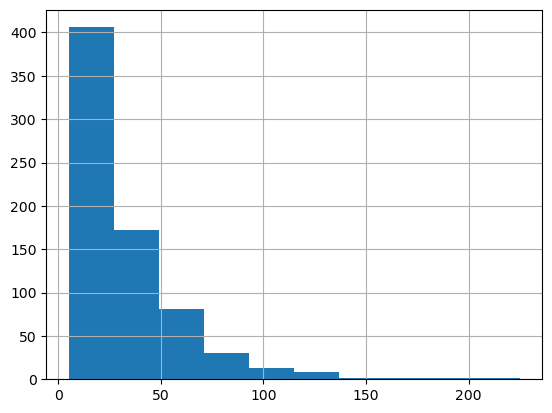

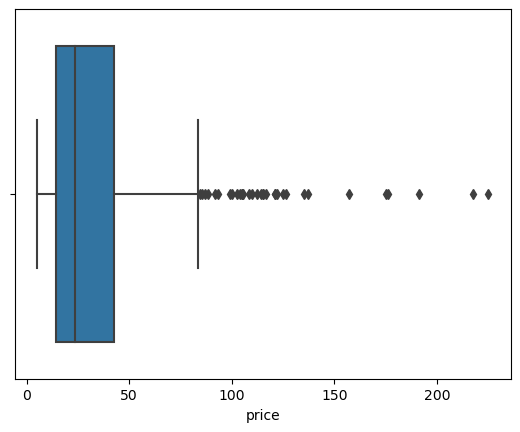

In [283]:
var_summary(chiffre_affaire,'price')

# <font color = #9f343e>3.3 | Bonus</font> <a class="anchor" id="section3.3"></a>
## <font color = #34749f> 3.3.1 | Number of products by price range</font> <a class="anchor" id="section3.3.1"></a>

In [314]:
# Product - Price descending
chiffre_affaire[list_analyse].sort_values('price',ascending=False)

,post_name,id_web,product_id,onsale_web,total_sales,price,stock_quantity,stock_status,chiffre_affaire
200,champagne-egly-ouriet-grand-cru-millesime-2008,15940,4352,1,5.0,225.0,0,outofstock,1125.0
426,david-duband-charmes-chambertin-grand-cru-2014,14581,5001,1,0.0,217.5,20,instock,0.0
589,coteaux-champenois-egly-ouriet-ambonnay-rouge-2016,14983,5892,1,3.0,191.3,10,instock,573.9
219,cognac-frapin-vip-xo,3510,4402,1,13.0,176.0,8,instock,2288.0
555,camille-giroud-clos-de-vougeot-2016,15185,5767,1,0.0,175.0,12,instock,0.0
...,...,...,...,...,...,...,...,...,...
99,maurel-pays-doc-chenin-colombard-2019,16211,4173,1,13.0,5.7,100,instock,74.1
100,maurel-cabardes-tradition-2017,16209,4174,1,6.0,5.7,94,instock,34.2
562,maurel-pays-d-oc-cabernet-sauvignon-2017,14338,5777,1,0.0,5.7,132,instock,0.0
98,maurel-pays-oc-chardonnay-2019,16210,4172,1,43.0,5.7,167,instock,245.1


In [315]:
fig = px.histogram(chiffre_affaire, 
                   x="price",
                  nbins=int(chiffre_affaire['price'].nunique()/10)
                  )
fig.update_layout(
    xaxis_title="Price range (per 10€)",
    yaxis_title="Count",
    title="Price range difference (range = 10€) on the website",
    bargap=0.05
)
fig.show()

## <font color = #34749f> 3.3.2 | Relationship between price and number of sales</font> <a class="anchor" id="section3.3.2"></a>

In [317]:
fig = px.scatter(chiffre_affaire[chiffre_affaire["total_sales"] != 0],
                y="total_sales",
                x="price",
)
fig.update_layout(
    title="Relationship between the price and the number of sales per product",
    xaxis_title="Price (€)",
    yaxis_title="Number of sales"
)
fig.show()

## <font color = #34749f> 3.3.3 | Segmentation of the turnover : Top 10, 20, 30, 40</font> <a class="anchor" id="section3.3.3"></a>

Allows you to understand what's going on to identify product categories

In [318]:
# Creation of a dataframe that does not take into account the zero turnover + sorting turnover decreasing
df = chiffre_affaire[chiffre_affaire["chiffre_affaire"]!=0].sort_values('chiffre_affaire',ascending=False) 

# Split of the dataframe
s_10, s_20, s_30, s_40 = np.split(df, [int(.1*len(df)), int(.3*len(df)), int(.6*len(df))])


In [319]:
import plotly.graph_objects as go

labels = ["10%","10-30%","30-60%","60-100%"]
values = [s_10['chiffre_affaire'].sum(),s_20['chiffre_affaire'].sum(),s_30['chiffre_affaire'].sum(),s_40['chiffre_affaire'].sum()]

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.2)])
fig.update_layout(
    title = "Sales segmentation",
    legend_title = "Product classification - Sales: ",
    autosize = True,
)
fig.update_traces(
    textposition = 'inside',
    textinfo="value+percent",
    texttemplate = "<br>".join([
        "Sales : %{value:,.2f}€",
        "Share : %{percent}"
    ])
)
fig.show()

### <font color = #9f343e>**Conclusion :** </font>
The outliers are not really outliers... they are just more expensive products.
# End of the notebook!